In [5]:
# 1.pandas基本接受
#  numpy列表式序列化矩阵，没有数值标签
#  pandas字典式矩阵，基于numpy构建, 主要两个数据结构：Series和DataFrame

import pandas as pd
import numpy as np

# a = pd.Series([1, 2, 3, np.NaN, 4, 7])  # np.NaN
# print(a)

# print(pd.DataFrame(np.arange(12).reshape(3, 4)))

# dates = pd.date_range('2019-1-1', periods=9)  # 日期序列
# print(dates)
# df = pd.DataFrame(np.random.randn(9, 5), index=dates, columns=['a', 'b', 'c', 'd', 'e'])  # radn(),按形状生成随机数矩阵
# print(df)
# print(df.T)
# print(df.dtypes)
# print(df.columns)
# print(df.values)
# print(df.describe())  # 数据总结

df1 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo'})
print(df1)
print(df1.sort_index(axis=0,  ascending=False))   # 根据索引降序
print(df1.sort_values(by='E'))  


     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo
     A          B    C  D      E    F
3  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
0  1.0 2013-01-02  1.0  3   test  foo
     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
2  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
3  1.0 2013-01-02  1.0  3  train  foo


In [91]:

#  2.选择数据
dates2 = pd.date_range('2001.1.1', periods=7)
print(dates2)

df2 = pd.DataFrame(np.arange(28).reshape(7, 4), index=dates2, columns=['a', 'b', 'c', 'd'])  # 指定4行，7列
print(df2['a'], df2.b)
print(df2[:2],'\n', df2['2001.1.1':'2001.1.3'])   # 简单取键只支持行


# 根据loc  根据标签选择
print(df2.loc['2001.1.2':'2001.1.5', 'b':'c'])

# 根据序列 iloc ,根据索引位置， 选某一个，连续选或者跨行选等操作。
print(df2.iloc[1:3, [1, 3]], '\n\n', df2.iloc[[1, 3], [1, 3]] )

# 通过判断
print(df2[df2.a > 8])  #  'a'列中值大于8的行

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07'],
              dtype='datetime64[ns]', freq='D')
2001-01-01     0
2001-01-02     4
2001-01-03     8
2001-01-04    12
2001-01-05    16
2001-01-06    20
2001-01-07    24
Freq: D, Name: a, dtype: int32 2001-01-01     1
2001-01-02     5
2001-01-03     9
2001-01-04    13
2001-01-05    17
2001-01-06    21
2001-01-07    25
Freq: D, Name: b, dtype: int32
            a  b  c  d
2001-01-01  0  1  2  3
2001-01-02  4  5  6  7 
             a  b   c   d
2001-01-01  0  1   2   3
2001-01-02  4  5   6   7
2001-01-03  8  9  10  11
             b   c
2001-01-02   5   6
2001-01-03   9  10
2001-01-04  13  14
2001-01-05  17  18
            b   d
2001-01-02  5   7
2001-01-03  9  11 

              b   d
2001-01-02   5   7
2001-01-04  13  15
             a   b   c   d
2001-01-04  12  13  14  15
2001-01-05  16  17  18  19
2001-01-06  20  21  22  23
2001-01-07  24  25  26  27


In [115]:
# 3.pandas 设置值
df3 = pd.DataFrame(np.arange(25).reshape(5, 5), index=pd.date_range('20190101', periods=5), columns=['a', 'b', 'c', 'd', 'e' ])
print(df3)
df3.iloc[2,2] = 222  # 不是用iloc 会加一个标签列
df3.loc['20190102', 'e'] = 444
df3.d = np.nan
df3.a[df3.a > 15] = 55555
df3['f'] = pd.Series(np.zeros((5, )), index=pd.date_range('20190101', periods=5)) # 等于合并一个纵向矩阵
print(df3)

             a   b   c   d   e
2019-01-01   0   1   2   3   4
2019-01-02   5   6   7   8   9
2019-01-03  10  11  12  13  14
2019-01-04  15  16  17  18  19
2019-01-05  20  21  22  23  24
                a   b    c   d    e    f
2019-01-01      0   1    2 NaN    4  0.0
2019-01-02      5   6    7 NaN  444  0.0
2019-01-03     10  11  222 NaN   14  0.0
2019-01-04     15  16   17 NaN   19  0.0
2019-01-05  55555  21   22 NaN   24  0.0


S:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [142]:
#  4.处理丢失数据
#  有时候我们导入或处理数据, 会产生一些空的或者是 NaN 数据
df4 = pd.DataFrame(np.random.randn(5, 4), index=pd.date_range('100101', periods=5), columns=['1', '2', '3', '4'])
df4.iloc[2, 2] = np.nan
df4.iloc[3,:] = np.nan
print(df4)
print(df4.dropna(axis=0, how='any')) # 从行/列找，以何种方式丢弃行/列   any有一个， 
print(df4.fillna(value=99))  # 填充
print(df4.isnull()) # 判断是否有缺失数据 NaN
print(np.any(df4.isnull()))

                   1         2         3         4
2001-10-01  0.149759 -0.848518 -1.040214  0.173916
2001-10-02  0.514964 -0.217277  0.651159 -1.153114
2001-10-03 -0.100755 -0.379902       NaN  0.423365
2001-10-04       NaN       NaN       NaN       NaN
2001-10-05 -0.060351 -1.418219  1.042274  2.050855
                   1         2         3         4
2001-10-01  0.149759 -0.848518 -1.040214  0.173916
2001-10-02  0.514964 -0.217277  0.651159 -1.153114
2001-10-05 -0.060351 -1.418219  1.042274  2.050855
                    1          2          3          4
2001-10-01   0.149759  -0.848518  -1.040214   0.173916
2001-10-02   0.514964  -0.217277   0.651159  -1.153114
2001-10-03  -0.100755  -0.379902  99.000000   0.423365
2001-10-04  99.000000  99.000000  99.000000  99.000000
2001-10-05  -0.060351  -1.418219   1.042274   2.050855
                1      2      3      4
2001-10-01  False  False  False  False
2001-10-02  False  False  False  False
2001-10-03  False  False   True  False
2001

In [153]:
# 5.导入导出  
#  pandas可以读取与存取的资料格式有很多种，像csv、excel、json、html与pickle等…， 详细请看官方说明文件
# read form
data = pd.read_csv(r'C:\Users\yl\Desktop\student.csv')
print(data)
# save to
data.to_pickle(r'C:\Users\yl\Desktop\student.pickle')

    Student ID  name   age  gender
0         1100  Kelly   22  Female
1         1101    Clo   21  Female
2         1102  Tilly   22  Female
3         1103   Tony   24    Male
4         1104  David   20    Male
5         1105  Catty   22  Female
6         1106      M    3  Female
7         1107      N   43    Male
8         1108      A   13    Male
9         1109      S   12    Male
10        1110  David   33    Male
11        1111     Dw    3  Female
12        1112      Q   23    Male
13        1113      W   21  Female


In [31]:
# 6.合并concat
df6a = pd.DataFrame(np.ones((4, 4))*0, columns=['a', 'b', 'c', 'd'])
df6b = pd.DataFrame(np.ones((4, 4))*1, columns=['a', 'b', 'c', 'd'])
df6c = pd.DataFrame(np.ones((4, 4))*2, columns=['a', 'b', 'c', 'd'])
# print(df6a)
# print(df6b)
# print(df6c)
# print(pd.concat([df6a, df6b, df6c], axis=0, ignore_index=True)) #  axis竖向/横向合并
# print(df6a.append(df6b, ignore_index=True))  #  添加数据，只有纵向合并
df6a = pd.DataFrame(np.ones((4, 4))*0, index=[1, 3, 4, 5], columns=['a', 'b', 'c', 'f'])
df6b = pd.DataFrame(np.ones((4, 4))*1, index=[2, 3, 4, 5],columns=['a', 'b', 'c', 'd'])
print(pd.concat([df6b, df6a], join='inner'))  # join合并方式 inner/outer
print(pd.concat([df6b, df6a], join_axes=[df6a.columns], axis=0)) # 依照axes合并

     a    b    c
2  1.0  1.0  1.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
5  1.0  1.0  1.0
1  0.0  0.0  0.0
3  0.0  0.0  0.0
4  0.0  0.0  0.0
5  0.0  0.0  0.0
     a    b    c    f
2  1.0  1.0  1.0  NaN
3  1.0  1.0  1.0  NaN
4  1.0  1.0  1.0  NaN
5  1.0  1.0  1.0  NaN
1  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0
5  0.0  0.0  0.0  0.0


In [52]:
# 7.合并merge
"""
参数：on, how, indicator

"""
# 依据一组key合并
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                             'A': ['A0', 'A1', 'A2', 'A3'],
                             'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                              'C': ['C0', 'C1', 'C2', 'C3'],
                              'D': ['D0', 'D1', 'D2', 'D3']})
print(left,'\n' , right)
print(pd.merge(left, right, on='key'))
# 依据两组key合并，合并时有4种方法how = ['left', 'right', 'outer', 'inner']，预设值how='inner'。
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                      'key2': ['K0', 'K1', 'K0', 'K1'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                       'key2': ['K0', 'K0', 'K0', 'K0'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})
print(pd.merge(left, right, on=['key1', 'key2'], how='outer', indicator='merge_way'))  # indicator=True会将合并的记录放在新的一列。
# 依据index合并 
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])
print(pd.merge(left, right, left_index=True, right_index=True, how='outer', indicator='merge_way'))
# overlapping的问题
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})
print(pd.merge(boys, girls, on='k', suffixes=['_boy', '_girl']))

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3 
   key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3
  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3
  key1 key2    A    B    C    D   merge_way
0   K0   K0   A0   B0   C0   D0        both
1   K0   K1   A1   B1  NaN  NaN   left_only
2   K1   K0   A2   B2   C1   D1        both
3   K1   K0   A2   B2   C2   D2        both
4   K2   K1   A3   B3  NaN  NaN   left_only
5   K2   K0  NaN  NaN   C3   D3  right_only
      A    B    C    D   merge_way
K0   A0   B0   C0   D0        both
K1   A1   B1  NaN  NaN   left_only
K2   A2   B2   C2   D2        both
K3  NaN  NaN   C3   D3  right_only
    k  age_boy  age_girl
0  K0        1         4
1  K0        1         5


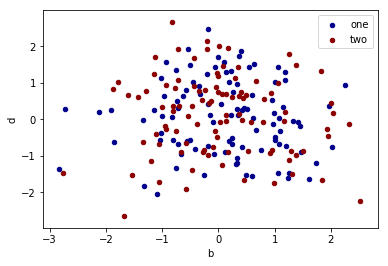

None


In [73]:
# 8. plot 出图 （数据可视化）
"""
bar
hist
box
kde
area
scatter
hexbin
"""

import matplotlib.pyplot as plt

# data = pd.Series(np.random.randn(100), index=np.arange(100))
data = pd.DataFrame(np.random.randn(100, 4), index=np.arange(100), columns=list("abcd")) # randn 生成随机矩阵

data.cumsum()
data.plot()

print(plt.show())

ax = data.plot.scatter(x='a',y='c', color='DarkBlue', label='one')
data.plot.scatter(x='b',y='d', color='DarkRed', ax=ax, label='two')

data.plot()

print(plt.show())